In [2]:
import seaborn as sbrn
import numpy as np
import pandas as pd
import scipy.stats as s
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('datal.csv')
data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [4]:
data['revol.bal'] = data['revol.bal'].astype(float)
data['fico'] = data['fico'].astype(float)
# data['Fat'] = data['Fat'].astype(float)

In [5]:
data.drop('purpose',axis=1,inplace=True)
data.drop('inq.last.6mths',axis=1,inplace=True)
data.drop('delinq.2yrs',axis=1,inplace=True)
data.drop('pub.rec',axis=1,inplace=True)
data.drop('not.fully.paid',axis=1,inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   int.rate           9578 non-null   float64
 2   installment        9578 non-null   float64
 3   log.annual.inc     9578 non-null   float64
 4   dti                9578 non-null   float64
 5   fico               9578 non-null   float64
 6   days.with.cr.line  9578 non-null   float64
 7   revol.bal          9578 non-null   float64
 8   revol.util         9578 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 673.6 KB


In [7]:
data.isnull().sum().sort_values(ascending=False)

credit.policy        0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
dtype: int64

In [8]:
data_kolom = data.columns
data_kolom = list(data_kolom)
data_kolom.remove('credit.policy')

data.head()


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util
0,1,0.1189,829.10,11.350407,19.48,737.0,5639.958333,28854.0,52.1
1,1,0.1071,228.22,11.082143,14.29,707.0,2760.000000,33623.0,76.7
2,1,0.1357,366.86,10.373491,11.63,682.0,4710.000000,3511.0,25.6
3,1,0.1008,162.34,11.350407,8.10,712.0,2699.958333,33667.0,73.2
4,1,0.1426,102.92,11.299732,14.97,667.0,4066.000000,4740.0,39.5


In [9]:
samp = {'X':np.concatenate((np.random.normal(loc=50,scale=3,size=(284,)),np.random.normal(loc=80,scale=5,size=(285,))),axis=0),
                'credit.policy':np.concatenate((np.array(['1']*284),np.array(['0']*285)),axis=0)}
samp = pd.DataFrame(data=samp)

<AxesSubplot: xlabel='X'>

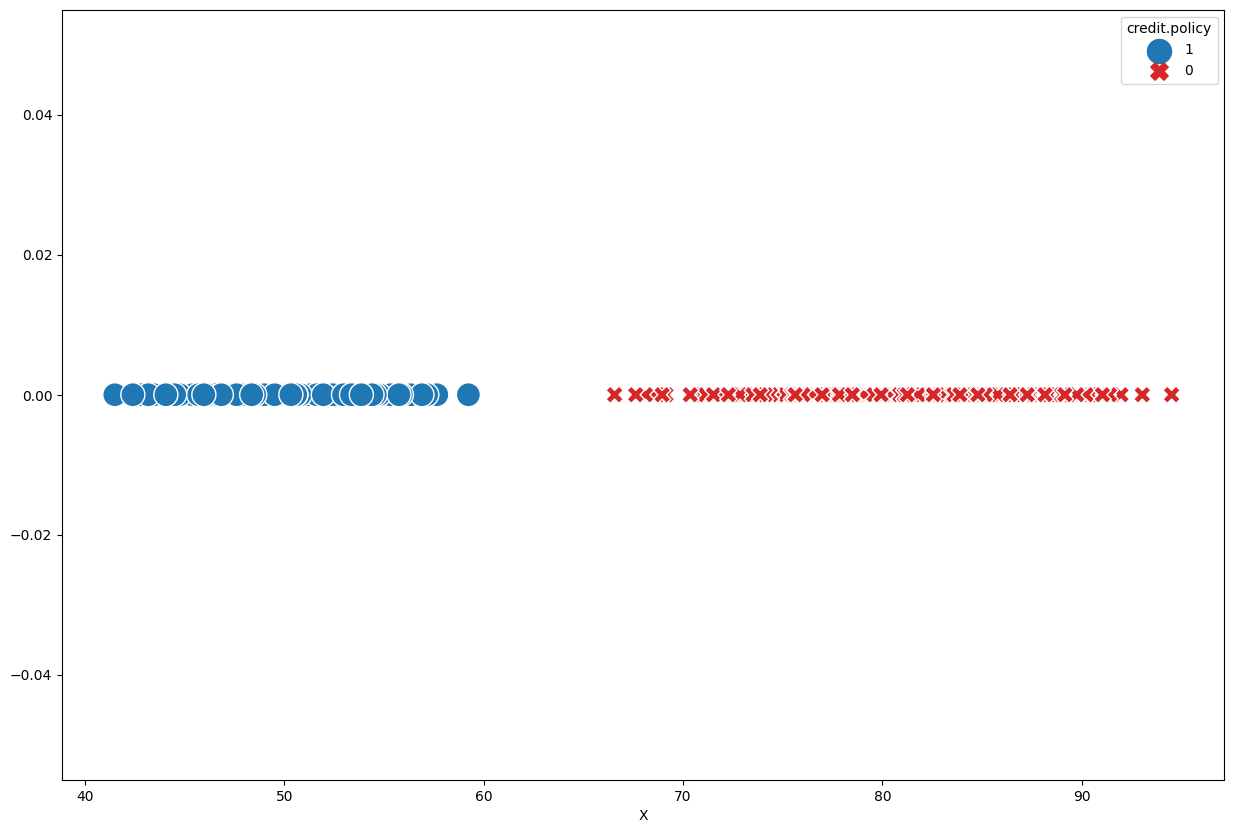

In [10]:
plt.figure(figsize=(15,10))
sbrn.scatterplot(data=samp,x=samp.columns[0],y=[0]*len(samp),hue='credit.policy',
                palette=[sbrn.color_palette()[0],sbrn.color_palette()[3]],style='credit.policy'
                ,size='credit.policy', sizes=(158,300))

<AxesSubplot: xlabel='X', ylabel='Density'>

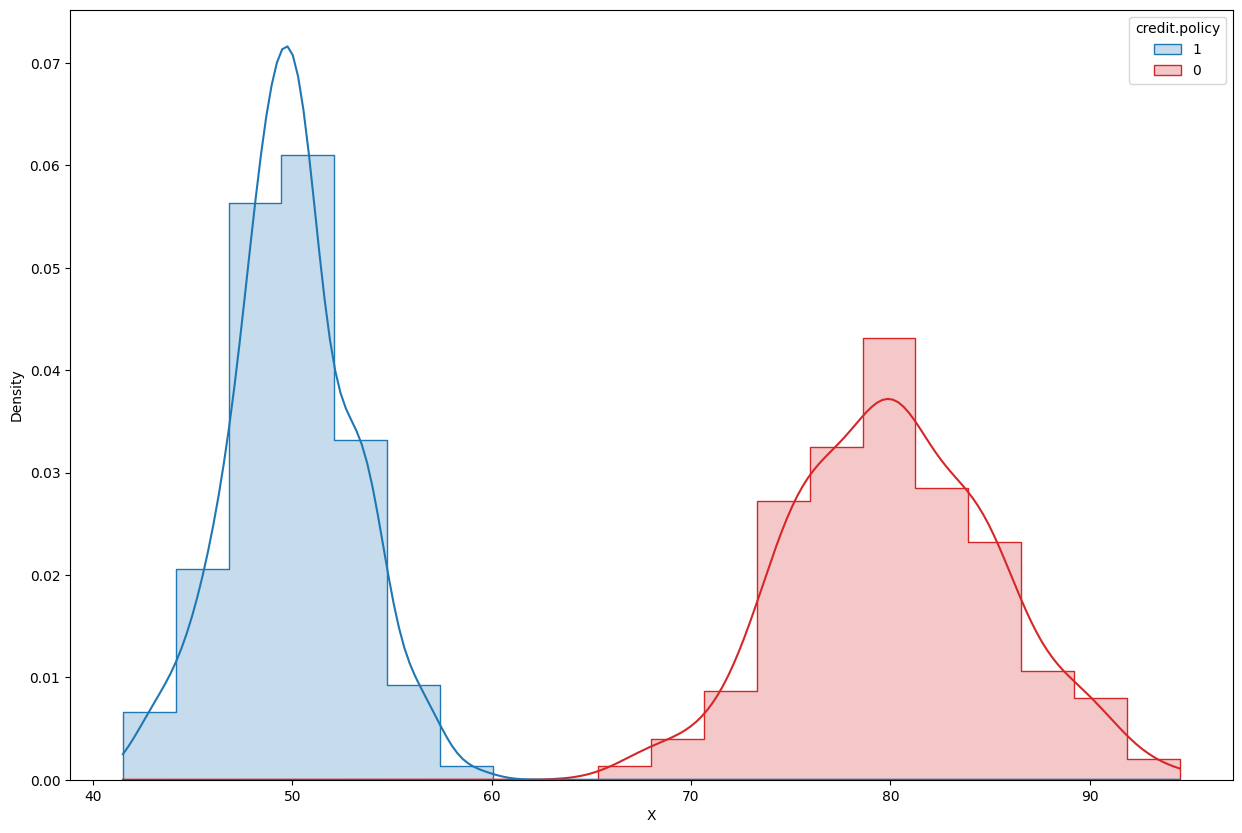

In [11]:
plt.figure(figsize=(15,10))
sbrn.histplot(data=samp,x=samp.columns[0],hue='credit.policy',stat='density', bins=20,kde=True,
                palette=[sbrn.color_palette()[0],sbrn.color_palette()[3]]
                ,element='step')

In [12]:
def plot_grid_histplot(data,data_kolom,shape,figure_size):
    
    data_kolom = np.array(data_kolom).reshape(shape[0],shape[1])
    fig, axes = plt.subplots(shape[0],shape[1],figsize=figure_size)

    for i in range(data_kolom.shape[0]):
        for j in range(data_kolom.shape[1]):

                    sbrn.histplot(data=data,x=data_kolom[i,j],hue='credit.policy',stat='density',bins=10,kde=True,
                 palette=[sbrn.color_palette()[0],sbrn.color_palette()[3]]
                 ,element='step',ax=axes[i,j])

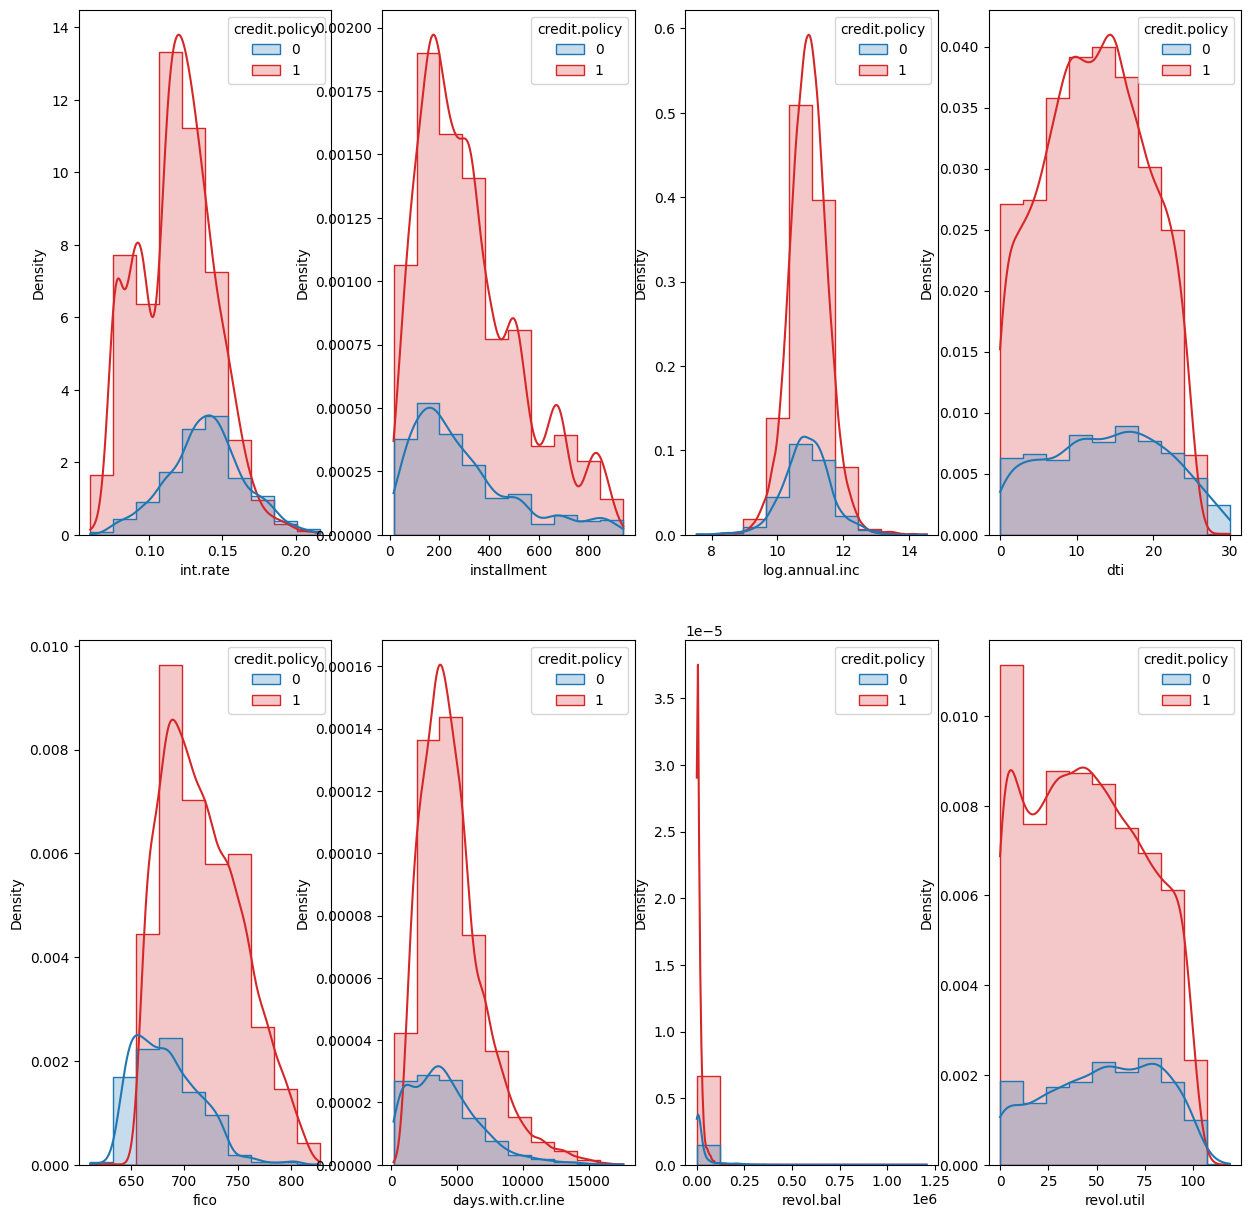

In [13]:
plot_grid_histplot(data,data_kolom,shape=(2,4),figure_size=(15,15))

In [14]:
data_copy = data.replace(to_replace=['0','1'],value=[0,1],inplace=False)

In [15]:
corr_df = data_copy.corr()
corr_df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000


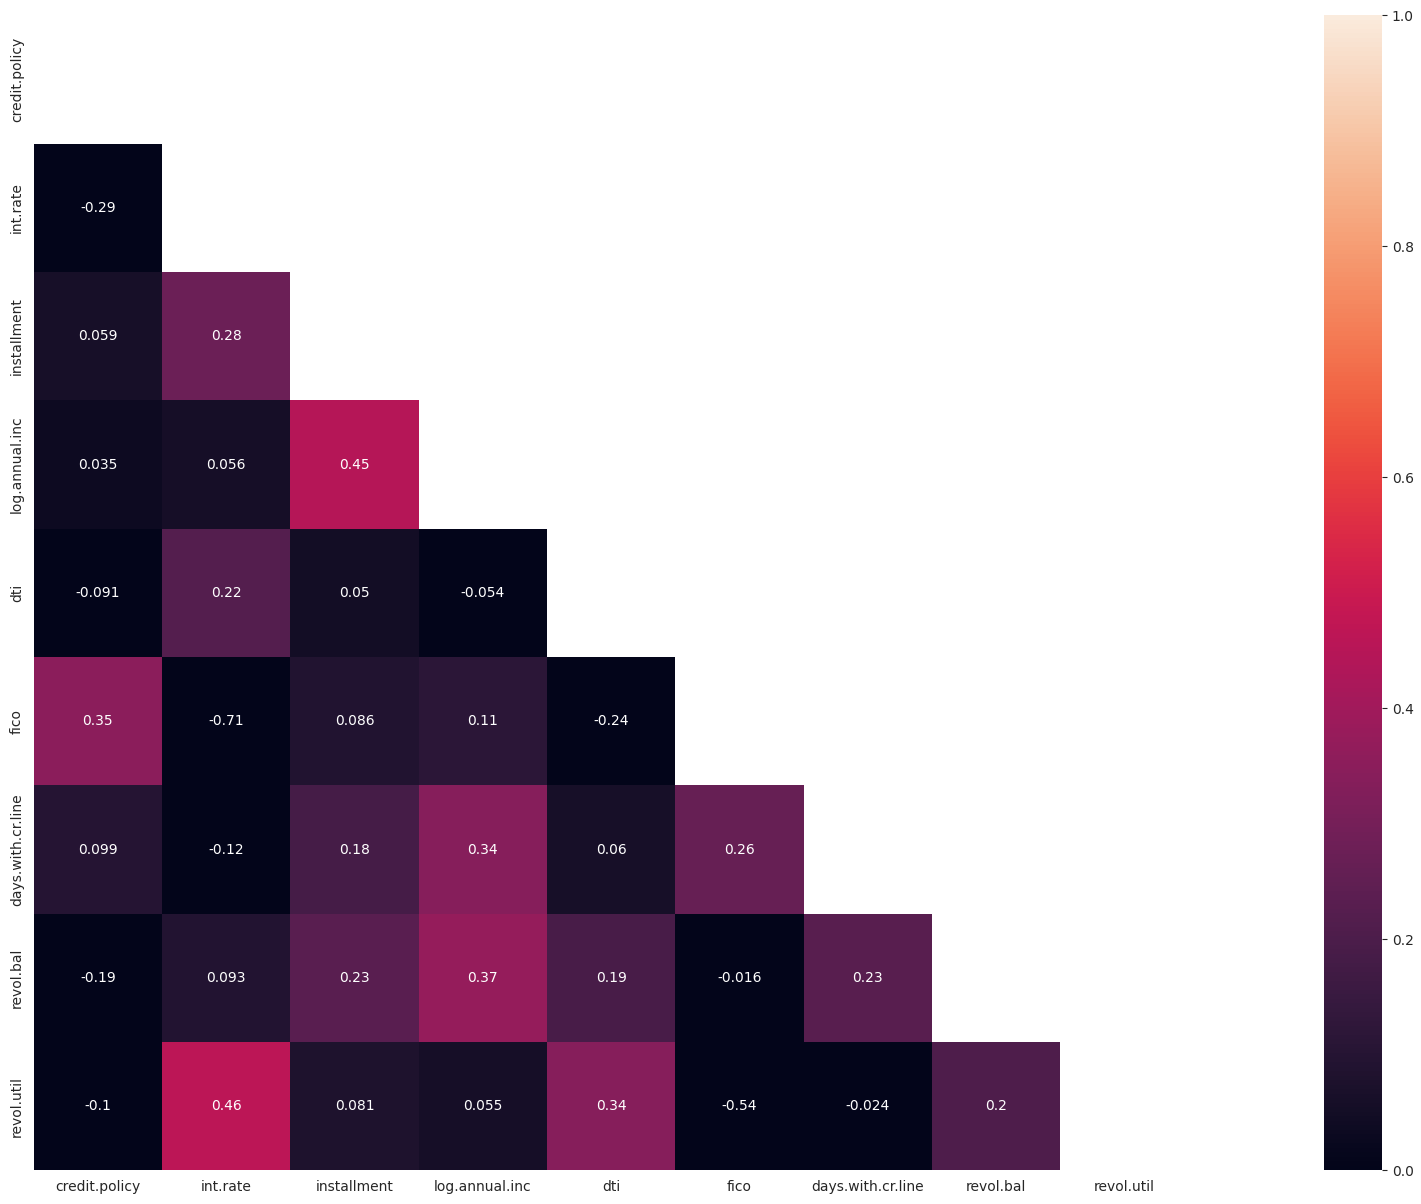

In [16]:
mask = np.zeros_like(data_copy.corr())
mask[np.triu_indices_from(mask)] = True
with sbrn.axes_style("white"):
    f, ax = plt.subplots(figsize=(35,15))
    sbrn.heatmap(data=corr_df,vmin=0,vmax=1,mask=mask,square=True,annot=True)

In [17]:
strong_relation_features = pd.Series(corr_df['credit.policy']).nlargest(n=5).iloc[1:]
strong_relation_features

fico                 0.348319
days.with.cr.line    0.099026
installment          0.058770
log.annual.inc       0.034906
Name: credit.policy, dtype: float64

In [18]:
Grade = data_copy['credit.policy']
data_copy = data_copy[list(strong_relation_features.to_dict().keys())]

# data_copy['Grade'] = Grade
# data_copy

In [19]:
data_copy['credit.policy'] = Grade
data_copy

,fico,days.with.cr.line,installment,log.annual.inc,credit.policy
0,737.0,5639.958333,829.10,11.350407,1
1,707.0,2760.000000,228.22,11.082143,1
2,682.0,4710.000000,366.86,10.373491,1
3,712.0,2699.958333,162.34,11.350407,1
4,667.0,4066.000000,102.92,11.299732,1
...,...,...,...,...,...
9573,672.0,10474.000000,344.76,12.180755,0
9574,722.0,4380.000000,257.70,11.141862,0
9575,687.0,3450.041667,97.81,10.596635,0
9576,692.0,1800.000000,351.58,10.819778,0


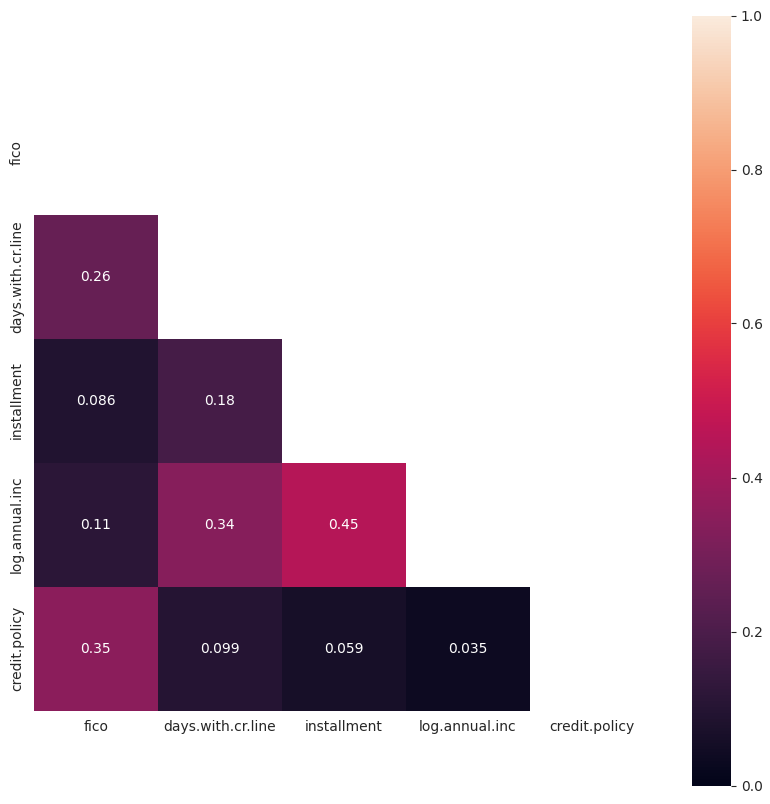

In [20]:
mask = np.zeros_like(data_copy.corr())
mask[np.triu_indices_from(mask)] = True
with sbrn.axes_style("white"):
    f, ax = plt.subplots(figsize=(10,10))
    sbrn.heatmap(data=data_copy.corr(),vmin=0,vmax=1,mask=mask,square=True,annot=True)

In [21]:
data_copy_cov = np.array(data_copy[list(strong_relation_features.to_dict().keys())].cov())
data_copy_cov

array([[1.44176170e+03, 2.50183830e+04, 6.76494076e+02, 2.67474932e+00],
       [2.50183830e+04, 6.23466131e+06, 9.47725826e+04, 5.17184685e+02],
       [6.76494076e+02, 9.47725826e+04, 4.28785239e+04, 5.70479195e+01],
       [2.67474932e+00, 5.17184685e+02, 5.70479195e+01, 3.77994719e-01]])

In [22]:
data_copy_cov.shape

(4, 4)

In [23]:
data_copy_cov_det = np.linalg.det(data_copy_cov)
data_copy_cov_det

95724734709981.27

In [24]:
data_copy

,fico,days.with.cr.line,installment,log.annual.inc,credit.policy
0,737.0,5639.958333,829.10,11.350407,1
1,707.0,2760.000000,228.22,11.082143,1
2,682.0,4710.000000,366.86,10.373491,1
3,712.0,2699.958333,162.34,11.350407,1
4,667.0,4066.000000,102.92,11.299732,1
...,...,...,...,...,...
9573,672.0,10474.000000,344.76,12.180755,0
9574,722.0,4380.000000,257.70,11.141862,0
9575,687.0,3450.041667,97.81,10.596635,0
9576,692.0,1800.000000,351.58,10.819778,0


In [25]:
data_copy[data_copy['credit.policy'] == 0].shape[0]

1868

In [26]:
data_copy[data_copy['credit.policy'] == 1].shape[0]

7710

In [29]:
class0_data = data_copy[data_copy['credit.policy'] == 0]
class1_data = data_copy[data_copy['credit.policy'] == 1]
# class2_data = data_copy[data_copy['Grade'] == 2

class0_training_data = class0_data.iloc[0:int(0.75*len(class0_data))]
class1_training_data = class1_data.iloc[0:int(0.75*len(class1_data))]
# class2_training_data = class2_data.iloc[0:int(0.75*len(class2_data))]

class0_cv_data = class0_data.iloc[int(0.75*len(class0_data)):]
class1_cv_data = class1_data.iloc[int(0.75*len(class1_data)):]
# class2_cv_data = class2_data.iloc[int(0.75*len(class2_data)):]

training_data = pd.concat([class0_training_data,class1_training_data])
cv_data = pd.concat([class0_cv_data,class1_cv_data])

In [30]:
training_data

,fico,days.with.cr.line,installment,log.annual.inc,credit.policy
7710,642.0,2490.000000,35.20,10.308953,0
7711,647.0,7212.000000,246.38,12.152144,0
7712,682.0,3780.041667,787.53,11.264464,0
7713,677.0,1643.000000,126.40,10.308953,0
7714,652.0,2847.000000,242.05,10.714418,0
...,...,...,...,...,...
5777,712.0,2610.041667,32.97,10.134599,1
5778,677.0,4758.000000,343.06,11.512925,1
5779,772.0,4410.041667,164.02,10.843495,1
5780,682.0,2190.000000,163.05,12.429216,1


In [31]:
cv_data

,fico,days.with.cr.line,installment,log.annual.inc,credit.policy
9111,717.0,5549.958333,267.73,10.915088,0
9112,717.0,8730.000000,742.95,11.759817,0
9113,792.0,6540.000000,31.20,11.759786,0
9114,727.0,1199.958333,220.50,10.571317,0
9115,727.0,4926.958333,163.57,11.512925,0
...,...,...,...,...,...
7705,742.0,3660.000000,663.28,11.012050,1
7706,697.0,4350.000000,716.95,11.034890,1
7707,737.0,3179.958333,393.65,11.225243,1
7708,717.0,5249.958333,851.89,11.238489,1


C:\Users\user\AppData\Local\Temp\ipykernel_3432\1667648986.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbrn.distplot(a=training_data[training_data['credit.policy'] == 1]['fico'],color='r')


<AxesSubplot: xlabel='fico', ylabel='Density'>

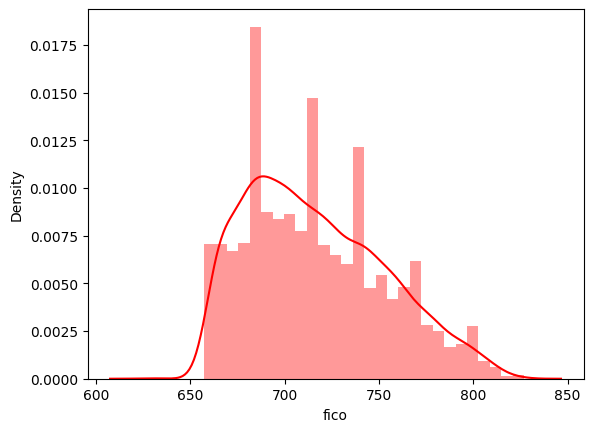

In [33]:
sbrn.distplot(a=training_data[training_data['credit.policy'] == 1]['fico'],color='r')

In [34]:
mu_1 = np.mean(training_data[training_data['credit.policy'] == 1]['fico'])
sigma_1 = np.std(training_data[training_data['credit.policy'] == 1]['fico'])
print(mu_1)
print(sigma_1)

716.5321687997233
36.697623706649566


C:\Users\user\AppData\Local\Temp\ipykernel_3432\561685629.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbrn.distplot(a=training_data[training_data['credit.policy'] == 0]['fico'])


<AxesSubplot: xlabel='fico', ylabel='Density'>

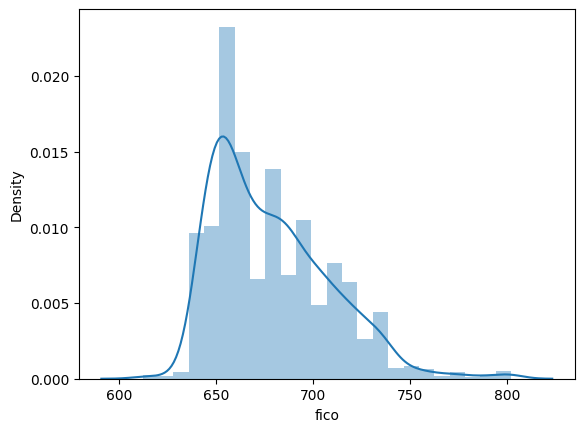

In [35]:
sbrn.distplot(a=training_data[training_data['credit.policy'] == 0]['fico'])

In [36]:
mu_0 = np.mean(training_data[training_data['credit.policy'] == 0]['fico'])
sigma_0 = np.std(training_data[training_data['credit.policy'] == 0]['fico'])
print(mu_0)
print(sigma_0)

678.5631691648822
30.235533400866426


In [37]:
bivariate_training_data = training_data[['fico','installment','credit.policy']]
bivariate_training_data

,fico,installment,credit.policy
7710,642.0,35.20,0
7711,647.0,246.38,0
7712,682.0,787.53,0
7713,677.0,126.40,0
7714,652.0,242.05,0
...,...,...,...
5777,712.0,32.97,1
5778,677.0,343.06,1
5779,772.0,164.02,1
5780,682.0,163.05,1


In [38]:
mu_1 = np.array(bivariate_training_data[bivariate_training_data['credit.policy'] == 1].iloc[:,0:2].mean())
cov_1 = np.array(bivariate_training_data[bivariate_training_data['credit.policy'] == 1].iloc[:,0:2].cov())
print(mu_1)
print(cov_1)

[716.5321688  312.33432895]
[[ 1346.94854119   118.81118488]
 [  118.81118488 38168.52197145]]


In [39]:
mu_0 = np.array(bivariate_training_data[bivariate_training_data['credit.policy'] == 0].iloc[:,0:2].mean())
cov_0 = np.array(bivariate_training_data[bivariate_training_data['credit.policy'] == 0].iloc[:,0:2].cov())
print(mu_0)
print(cov_0)

[678.56316916 270.33593148]
[[  914.84047109   775.95547147]
 [  775.95547147 36886.16695472]]


In [40]:
def multivariate_gaussian_plot(mean_vec,cov_mat,X1_min,X1_max,X2_min,X2_max,p_min=0,p_max=0.2):
    X_1 = np.linspace(X1_min,X1_max,300)
    X_2 = np.linspace(X2_min,X2_max,300)
    X_1,X_2 = np.meshgrid(X_1,X_2)

    data = np.empty(X_1.shape+(2,))

    data[:,:,0] = X_1
    data[:,:,1] = X_2

    P_X_equals_x_and_Y_equals_y = s.multivariate_normal.pdf(data,mean=mean_vec,cov=cov_mat)

    fig = plt.figure(figsize=(12,12))
    axes = fig.gca(projection='3d')

    axes.plot_surface(X=X_1,Y=X_2,Z=P_X_equals_x_and_Y_equals_y,rstride=3,
                      cstride=3,linewidth=1,antialiased=True,cmap=cm.viridis)
    axes.contourf(X=X_1,Y=X_2,Z=P_X_equals_x_and_Y_equals_y,zdir='z',cmap=cm.viridis,offset=-0.15)
    axes.set_zlim(-0.15,p_max)

    axes.set_zticks(np.linspace(0,p_max,5))
    axes.view_init(27,-21)
    plt.show()

In [ ]:
multivariate_gaussian_plot(np.array([0,1]),np.array([[1,-0.75],[-0.75,1]]),-3,3,-3,4)

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 1200x1200 with 0 Axes>

In [56]:
mu_1 = np.array(training_data[training_data['credit.policy'] == 1].iloc[:,0:4].mean())
sigma_1 = np.array(training_data[training_data['credit.policy'] == 1].iloc[:,0:4].cov())
print(mu_1)
print(cov_1)

[ 716.5321688  4635.44124718  312.33432895   10.9297163 ]
[[ 1346.94854119   118.81118488]
 [  118.81118488 38168.52197145]]


In [55]:
mu_0 = np.array(training_data[training_data['credit.policy'] == 0].iloc[:,0:4].mean())
sigma_0 = np.array(training_data[training_data['credit.policy'] == 0].iloc[:,0:4].cov())
print(mu_0)
print(cov_0)

[ 678.56316916 3723.22736735  270.33593148   10.81523224]
[[  914.84047109   775.95547147]
 [  775.95547147 36886.16695472]]


In [57]:
def predict_classes(data):

    p_xi_on_class1 = s.multivariate_normal.pdf(data,mu_1,sigma_1)
    
    p_xi_on_class0 = s.multivariate_normal.pdf(data,mu_0,sigma_0)
    
    p_class1_on_xi = p_xi_on_class1/(p_xi_on_class0 + p_xi_on_class1)
    
    return p_class1_on_xi > 0.5

In [59]:
predicted_classes = predict_classes(cv_data.iloc[:,0:4])
predicted_classes

array([ True,  True,  True, ...,  True,  True,  True])

In [61]:
confusion_matrix(y_true=cv_data['credit.policy'],y_pred=predicted_classes)

array([[ 250,  217],
       [ 638, 1290]], dtype=int64)

In [62]:
print(classification_report(y_true=cv_data['credit.policy'],y_pred=predicted_classes))

              precision    recall  f1-score   support

           0       0.28      0.54      0.37       467
           1       0.86      0.67      0.75      1928

    accuracy                           0.64      2395
   macro avg       0.57      0.60      0.56      2395
weighted avg       0.74      0.64      0.68      2395

